# preprocessing of the data

In [1]:
import pandas as pd 
df=pd.read_csv("PlacementinCampusRecruitment.csv")
df2=pd.read_csv("PlacementinCampusRecruitment.csv")
print(df.isnull().sum())
df=df.interpolate() # handled the missing values
print('\n\n\n',df.describe())
df.set_index('sl_no',inplace=True)
df['hsc_s'].unique()



sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64



             sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = df[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']]
#observe carefully here we just handled the categorical data that is data containing strings in order to make our further
# calculation easy

for i in col:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,337500.0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int32  
 13  salary          215 non-null    float64
dtypes: float64(6), int32(8)
memory usage: 18.5 KB


In [4]:
# we see that our salary column is present here as float and we need to change that to a suitable format
df['salary'] = df['salary'].astype('int')
df['salary'].dtype


dtype('int32')

In [5]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.00000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372,287032.52093
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240,84313.32591
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.00000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,245000.00000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000,268000.00000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,300000.00000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.00000


# visualizing data

Number of Students didn't get placed : 67
Number of Students who got placed : 148


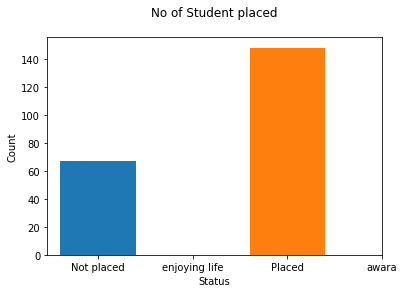

In [6]:
import matplotlib.pyplot as plt
import numpy as np

print("Number of Students didn't get placed : "+ str(len(df[df["status"]==0]))) # converted to string because concatenation
# cant be done of integer type or of float type
print("Number of Students who got placed : "+ str(len(df[df["status"]==1])))

plt.bar([-1],height=len(df[df["status"]==0])) # -1 and 1 in other line defines the distance between them 
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

import numpy as np
plt.xticks(np.arange(-1,3), ('Not placed','enjoying life', 'Placed','awara'))

# here -1 defines the starting postion of thes labels in the graph ingenral np is called so as to array([-1,  0,  1,  2])
# get this,,,,, it could also be like np.arange(-1,1) which would provide the label at desired loction because we have nothing 
# at location 0

plt.title("No of Student placed\n")
plt.show()

specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


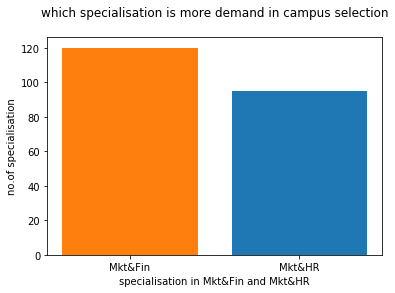

In [7]:
print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]==0])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]==1])))


plt.bar([1],height=len(df[df["specialisation"]==1]))
plt.bar([0],height=len(df[df["specialisation"]==0]))

plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

In [8]:
X = df.drop(['status','salary'], axis = 1)# we see it just drops down the status column and salary column
X


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
sl_no,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72


In [9]:
y = df['status']
y

sl_no
1      1
2      1
3      1
4      0
5      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: status, Length: 215, dtype: int32

# distribution of our data into training and testing set


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
#x_train
#x_test
x_test.iloc[0]
# uncomment these to see the data we have for training purpose 

gender             0.00
ssc_p             67.00
ssc_b              0.00
hsc_p             70.00
hsc_b              0.00
hsc_s              1.00
degree_p          65.00
degree_t           1.00
workex             0.00
etest_p           88.00
specialisation     1.00
mba_p             71.96
Name: 199, dtype: float64

In [11]:
#Applying standard scalar

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
result = {}


# training our model
M1 - logistic regression model 

In [12]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
result1 = model1.fit(x_train, y_train)


# Testing the model
predictions1 = result1.predict(x_test)

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
# checking accuracy of our model

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_test,predictions1)

0.813953488372093

In [15]:
result['Logistic Regression'] = accuracy_score(y_test,predictions1)
matrix1 = confusion_matrix(y_test,predictions1)
matrix1

array([[11,  5],
       [ 3, 24]], dtype=int64)

In [16]:
print('\n**Classification Report Of Logistic Regrssion:\n',classification_report(y_test,predictions1))


**Classification Report Of Logistic Regrssion:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



* M2 - Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
result2 = model2.fit(x_train,y_train)
predictions2 = result2.predict(x_test)
accuracy_score(y_test, predictions2)

0.7209302325581395

In [18]:
result['Decision Tree'] = accuracy_score(y_test, predictions2)
matrix2 = confusion_matrix(y_test,predictions2)
matrix2

array([[10,  6],
       [ 6, 21]], dtype=int64)

In [19]:
print('\n**Classification Report Of Decision Tree:\n',classification_report(y_test,predictions2))


**Classification Report Of Decision Tree:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.78      0.78      0.78        27

    accuracy                           0.72        43
   macro avg       0.70      0.70      0.70        43
weighted avg       0.72      0.72      0.72        43



* Random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
result3 = model3.fit(x_train,y_train)
predictions3 = result3.predict(x_test)
accuracy_score(y_test,predictions3)

0.6976744186046512

In [21]:
result['Random Forest'] = accuracy_score(y_test,predictions3)
matrix3 = confusion_matrix(y_test, predictions3)
matrix3

array([[ 7,  9],
       [ 4, 23]], dtype=int64)

In [22]:
print('\n**Classification Report Of Random Forest:\n',classification_report(y_test,predictions3))


**Classification Report Of Random Forest:
               precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.72      0.85      0.78        27

    accuracy                           0.70        43
   macro avg       0.68      0.64      0.65        43
weighted avg       0.69      0.70      0.68        43



* k nearest neighbour

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model4 = RandomForestClassifier()
result4 = model4.fit(x_train,y_train)
predictions4 = result4.predict(x_test)
accuracy_score(y_test,predictions4)

0.6976744186046512

In [24]:
result['k-nearest neighbors'] = accuracy_score(y_test, predictions4)
matrix4 = confusion_matrix(y_test,predictions4)
matrix4

array([[ 7,  9],
       [ 4, 23]], dtype=int64)

In [25]:
print('\n**Classification Report Of Random Forest:\n',classification_report(y_test,predictions4))


**Classification Report Of Random Forest:
               precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.72      0.85      0.78        27

    accuracy                           0.70        43
   macro avg       0.68      0.64      0.65        43
weighted avg       0.69      0.70      0.68        43



# accuracy of models

In [26]:
result

{'Logistic Regression': 0.813953488372093,
 'Decision Tree': 0.7209302325581395,
 'Random Forest': 0.6976744186046512,
 'k-nearest neighbors': 0.6976744186046512}

In [27]:
print('ssc_p to placement ', round(df['status'].corr(df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(df['status'].corr(df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(df['status'].corr(df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(df['status'].corr(df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(df['status'].corr(df['etest_p'])*100,1),'%')
print('workexp to placement ', round(df['status'].corr(df['workex'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %
workexp to placement  27.6 %


# using gui interface for the above project

In [28]:
clms=df2.columns
print(clms)
gndr=tuple(df2['gender'].unique())
sscb= tuple(df2['ssc_b'].unique())
hscb= tuple(df2['hsc_b'].unique())
hscs= tuple(df2['hsc_s'].unique())
degreet=tuple(df2['degree_t'].unique())
work=tuple(df2['workex'].unique())
spc=tuple(df2['specialisation'].unique())
gndr


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


('M', 'F')

In [29]:
print(df['gender'].unique(),df2['gender'].unique())
print(df['ssc_b'].unique(),df2['ssc_b'].unique())
print(df['hsc_b'].unique(),df2['hsc_b'].unique())
print(df['hsc_s'].unique(),df2['hsc_s'].unique())
print(df['degree_t'].unique(),df2['degree_t'].unique())
print(df['workex'].unique(),df2['workex'].unique())
print(df['specialisation'].unique(),df2['specialisation'].unique())
print(df['status'].unique(),df2['status'].unique())

[1 0] ['M' 'F']
[1 0] ['Others' 'Central']
[1 0] ['Others' 'Central']
[1 2 0] ['Commerce' 'Science' 'Arts']
[2 0 1] ['Sci&Tech' 'Comm&Mgmt' 'Others']
[0 1] ['No' 'Yes']
[1 0] ['Mkt&HR' 'Mkt&Fin']
[1 0] ['Placed' 'Not Placed']


In [30]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,NavigationToolbar2Tk) 

root=Tk()
root.title("check your placement status")
root.configure(background='lavender')

#root.overrideredirect(True)
root.geometry("{0}x{1}+1+1".format(root.winfo_screenwidth(), root.winfo_screenheight()))
#root.focus_set()  

# go through the predict functon at last 
def predict():
    d=[c1.get(),c2.get(),c3.get(),c4.get(),c5.get(),c6.get(),c7.get(),c8.get(),c9.get(),c10.get(),c11.get(),c12.get()]
    print(d)
    
    # as the data we are going to enter in tkinter is going to be a mixture of categorical and integer and float 
    # so here we will convert that to corresponding integer and float type
    e1=[int(1 if c1.get()=='M' else 0)]
    e2=[float(c2.get())]
    e3=[int(1 if c3.get()=='Others' else 0)]
    e4=[float(c4.get())]
    e5=[int(1 if c5.get()=='Others' else 0)]
    e6=[int(1 if c6.get()=='Commerce' else 2 if c5.get()=='Science' else 0)]
    e7=[float(c7.get())]
    e8=[int(2 if c8.get()=='Sci&Tech' else 0 if c8.get()=='Comm&Mgmt' else 1)]
    e9=[int(0 if c9.get()=='No' else 1)]
    e10=[float(c10.get())]
    e11=[int(1 if c11.get()=='Mkt&HR' else 0)]
    e12=[float(c12.get())]
    e=[e1+e2+e3+e4+e5+e6+e7+e8+e9+e10+e11+e12]
    
    answer=result4.predict(e)
    print(answer)
    
    if answer[0]==1:
        
        root2=Tk()
        root2.title("You will get placed from the campus")
        root2.geometry('950x400')
        root2.configure(background='lavender')
        
        lable2 = Label(root2, text="Congratulations You will get placed from campus.",background='thistle',fg="DodgerBlue2",font = "Arial 25 bold",anchor="w", borderwidth=5,relief="sunken",highlightcolor="#D2691E").place(x=90, y=100)
            
        button3 = Button(root2, text='Ok  THANKS ALOT', command=root2.destroy,width=30,background='#A0522D',relief='groove',font = "Arial 15",fg="#FDF5E6")
        button3.place(x=100,y=200)
        root2.mainloop()
            
    else:
         
        root2=Tk()
        root2.title("You will not get placed from the campus")
        root2.geometry('950x400')
        root2.configure(background='lavender')
        
        lable2 = Label(root2, text="Sorry to say, You will not get placed from campus.",background='thistle',fg="DodgerBlue2",font = "Arial 25 bold",anchor="w", borderwidth=5,relief="sunken",highlightcolor="#D2691E").place(x=90, y=100)
            
        button3 = Button(root2, text='Ok  THANKS ALOT', command=root2.destroy,width=30,background='#A0522D',relief='groove',font = "Arial 15",fg="#FDF5E6")
        button3.place(x=100,y=200)
     
        

        def analyse():
            root1=Tk()

            root1.title("placed or not placed")
            root1.geometry("{0}x{1}+1+1".format(root.winfo_screenwidth(), root.winfo_screenheight()))
            root1.configure(background='lavender')

            fig = Figure(figsize = (11,5), dpi = 100)

            huh1={'factor':['ssc_p','hsc_p','mba_p','degree_p','etest_p','workex'],
                  'placement percentage':[round(df['status'].corr(df['ssc_p'])*100),round(df['status'].corr(df['hsc_p'])*100),
                                         round(df['status'].corr(df['mba_p'])*100),round(df['status'].corr(df['degree_p'])*100),
                                         round(df['status'].corr(df['etest_p'])*100),round(df['status'].corr(df['workex'])*100)]}
            huh = DataFrame(huh1,columns=['factor','placement percentage'])

            plot1 = fig.add_subplot(111)
            huh = huh[['factor','placement percentage']].groupby('factor').sum()
            huh.plot(kind='bar', legend=True, ax=plot1)

            #plot1.bar([0],height=round(df['status'].corr(df['ssc_p'])*100)) 
            #plot1.bar([1],height=round(df['status'].corr(df['hsc_p'])*100))
            #plot1.bar([2],height=round(df['status'].corr(df['mba_p'])*100))
            #plot1.bar([3],height=round(df['status'].corr(df['degree_p'])*100))
            #plot1.bar([4],height=round(df['status'].corr(df['etest_p'])*100))
            #plot1.bar([5],height=round(df['status'].corr(df['workex'])*100))

            #plot1.set_xlabel("specialisation in Mkt&Fin and Mkt&HR")
            #plot1.set_ylabel("no.of specialisation")
            button3 = Button(root1, text='Ok I got it', command=root1.destroy,width=30,background='LightSteelBlue1',relief='groove',font = "Arial 15",fg="firebrick1")
            button3.place(x=520,y=600)
            lable = Label(root1, text="So you can see that the most important thing to get placed is ssc_p . So dude try to upskill that:",background='LightYellow3',font = "Arial 15 bold",fg="red2",borderwidth=5,relief="sunken",highlightcolor="orange").place(x=200, y=550)
            
            canvas = FigureCanvasTkAgg(fig, master = root1)  
            canvas.draw()
            canvas.get_tk_widget().pack()
            toolbar = NavigationToolbar2Tk(canvas,root1) 
            toolbar.update() 

            # placing the toolbar on the Tkinter window 
            canvas.get_tk_widget().pack()
            root1.mainloop()
            
        button4 = Button(root2, text='Analyse', command=analyse,width=10,background='#A0522D',relief='groove',font = "Arial 15",fg="#FDF5E6")
        button4.place(x=400,y=200)        
        root2.mainloop()  
            
C = Canvas(root,background='lavender')
filename = PhotoImage(file = "campus22.png")
background_label = Label(root, image=filename,borderwidth=7,relief='groove')
background_label.place(x=10, y=200)

imagelogo=PhotoImage(file='campus.png')
logo = Label(root, image=imagelogo,background='#FFE4C4')
logo.place(x=75, y=-20)
lable1 = Label(root, text="Campus Recruitment",background='azure',fg="SkyBlue1",font = "Arial 50 bold",borderwidth=15,relief="groove",highlightcolor="orange").place(x=340, y=30)

imageex=PhotoImage(file='campus.png')
imgg = Label(root, image=imageex)
imgg.place(x=1050, y=-20)
lable1 = Label(root, text="Here you will know probability of getting placed from campus.",background='thistle',fg="DodgerBlue2",font = "Arial 15 bold",anchor="w", borderwidth=5,relief="sunken",highlightcolor="#D2691E").place(x=390, y=150)


lable1 = Label(root, text="gender:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=200)
lable2 = Label(root, text="ssc_percentage:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=230)
lable3 = Label(root, text="ssc_board:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=260)
lable4 = Label(root, text="hsc_percentage:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=290)
lable5 = Label(root, text="hsc_board:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=320)
lable6 = Label(root, text="hsc_stream:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=350)
lable7 = Label(root, text="degree_percentage:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=380)
lable8 = Label(root, text="degree:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=410)
lable9 = Label(root, text="work_exp:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=440)
lable10 = Label(root, text="etest_p",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=470)
lable11 = Label(root, text="specialization:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=500)
lable12 = Label(root, text="mba_percentage:",background='lavender',font = "Arial 15 bold",fg="#D2691E").place(x=790, y=530)

c1 = ttk.Combobox(root, width = 27,values = gndr ); c1.place(x=1000,y=200)
c2=  ttk.Entry(root,width=27);c2.place(x=1000,y=230)
c3=  ttk.Combobox(root, width = 27,values = sscb ); c3.place(x=1000,y=260)
c4=  ttk.Entry(root,width=27);c4.place(x=1000,y=290)
c5=  ttk.Combobox(root, width = 27,values = hscb ); c5.place(x=1000,y=320)
c6=  ttk.Combobox(root, width = 27,values = hscs ); c6.place(x=1000,y=350)
c7=  ttk.Entry(root,width=27);c7.place(x=1000,y=380)
c8=  ttk.Combobox(root, width = 27,values = degreet ); c8.place(x=1000,y=410)
c9=  ttk.Combobox(root, width = 27,values = work ); c9.place(x=1000,y=440)
c10=  ttk.Entry(root,width=27);c10.place(x=1000,y=470)
c11=  ttk.Combobox(root, width = 27,values = spc ); c11.place(x=1000,y=500)
c12=  ttk.Entry(root,width=27);c12.place(x=1000,y=530)

button1 = Button(root, text="Predict",command=predict,width=10,background='#A0522D',relief='groove',font = "Arial 15",fg="#FDF5E6")
button1.place(x=800, y=600)
button2 = Button(root, text='Close', command=root.destroy,width=10,background='#A0522D',relief='groove',font = "Arial 15",fg="#FDF5E6")
button2.place(x=950,y=600)


#C.pack()
root.mainloop()

['M', '89', 'Central', '78', 'Central', 'Commerce', '89', 'Comm&Mgmt', 'Yes', '78', 'Mkt&Fin', '89']
[1]
['M', '19', 'Central', '18', 'Central', 'Commerce', '19', 'Comm&Mgmt', 'Yes', '18', 'Mkt&Fin', '19']
[0]


In [31]:
a1=[2]
a2=[3]
a3=[4]
a=[a1+a2+a3]
a

[[2, 3, 4]]

In [32]:
y=round(df['status'].corr(df['ssc_p'])*100)